# DM-24366: Monthly April 2020 ap_pipe HiTS2015 reprocessing

### The HiTS dataset and AP Pipeline
As usual, I ran ap_pipe.py via slurm on the HiTS2015 dataset with HiTS2014 as templates. I did not create new templates, but rather used the ones I built in Jan 2020. The dataset consists of 3 fields (pointings), each revisited 28 times in 2015, in _g_ band. Two of the fields have a small overlap region.

The last step of ap_pipe is to save information about DIA Objects and DIA Sources in an Alert Production Database (APDB). I use this database to make some plots below. "Filtered" or "Good" means sources with one or more of the "bad," "saturated center," or "suspect" pixel flags have been excluded.

### Small decrease in DIA Source counts compared to Feb 2020
The most recent "monthly" rerun with no special configs was in February 2020. There was also a special rerun in March 2020 with in-progress fixes Gabor did to the decorrelation afterburner for DM-21868. I compare these new April results to both.

There are no obvious qualitative differences between the reruns.

Compared to February, there is a **small decrease in DIA Source counts**. The DIA Object counts are about the same.

The special decorrelation rerun in March has more DIA Sources **and** notably more DIA Objects than either of the other two.

In general, fewer DIA Sources is better, since most of our detections are false positives.

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib

import lsst.daf.persistence as dafPersist

In [2]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

In [ ]:
# Only if you change anything in the code imported above
importlib.reload(doa)
importlib.reload(pla)

In [3]:
repo = '/project/mrawls/hits2015/rerun/cw_2020_04'

In [4]:
objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo)

/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/ap_association/19.0.0-15-gcb2ec15+6/python/lsst/ap/association/mapApData.py:388: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  table_list = list(yaml.load_all(yaml_stream))


<IPython.core.display.Javascript object>


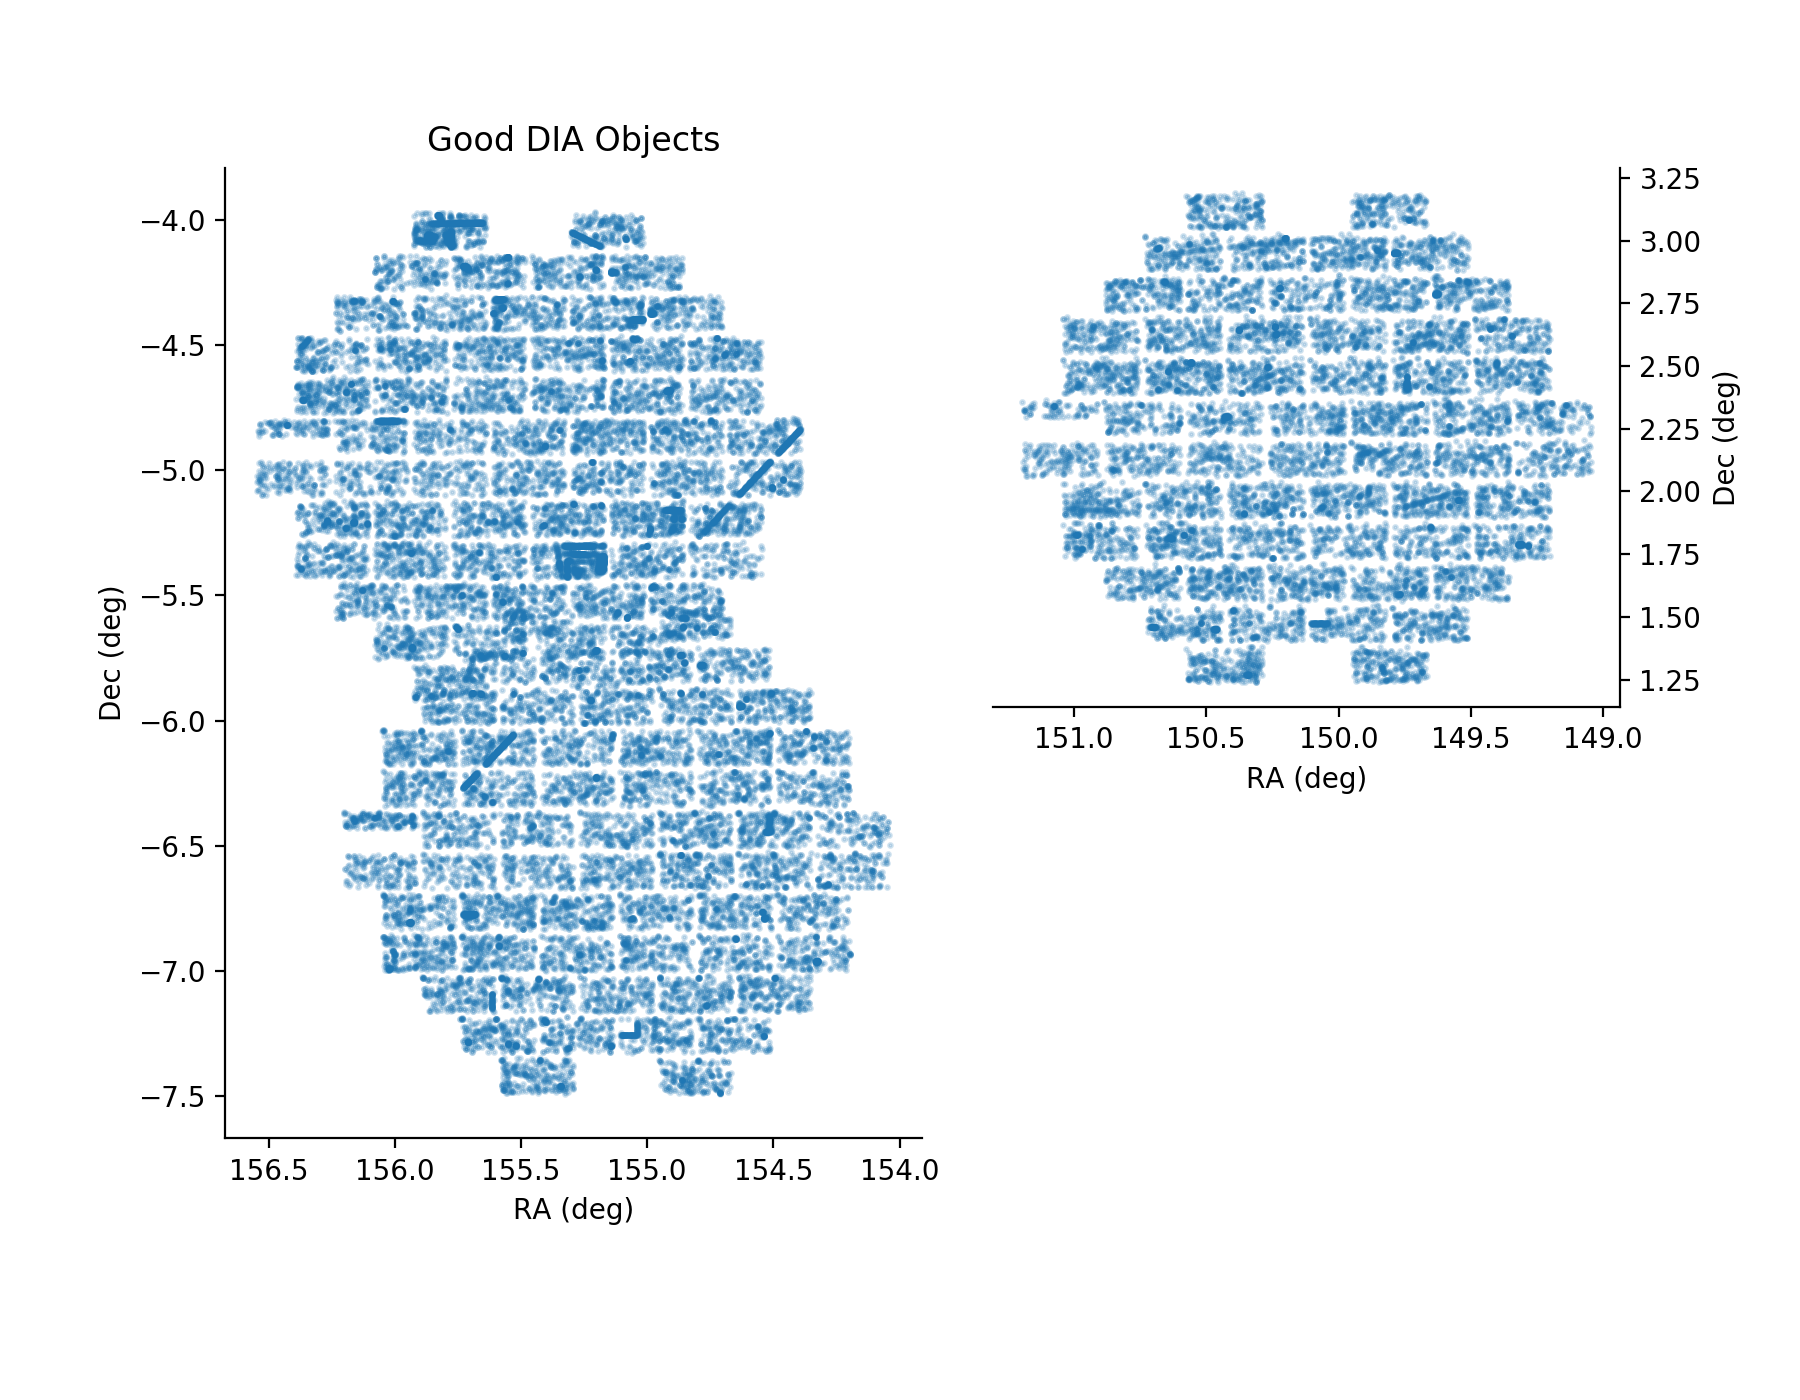

In [5]:
hitsPlot = pla.plotHitsSourcesOnSky(goodObj, title='Good DIA Objects')

<IPython.core.display.Javascript object>


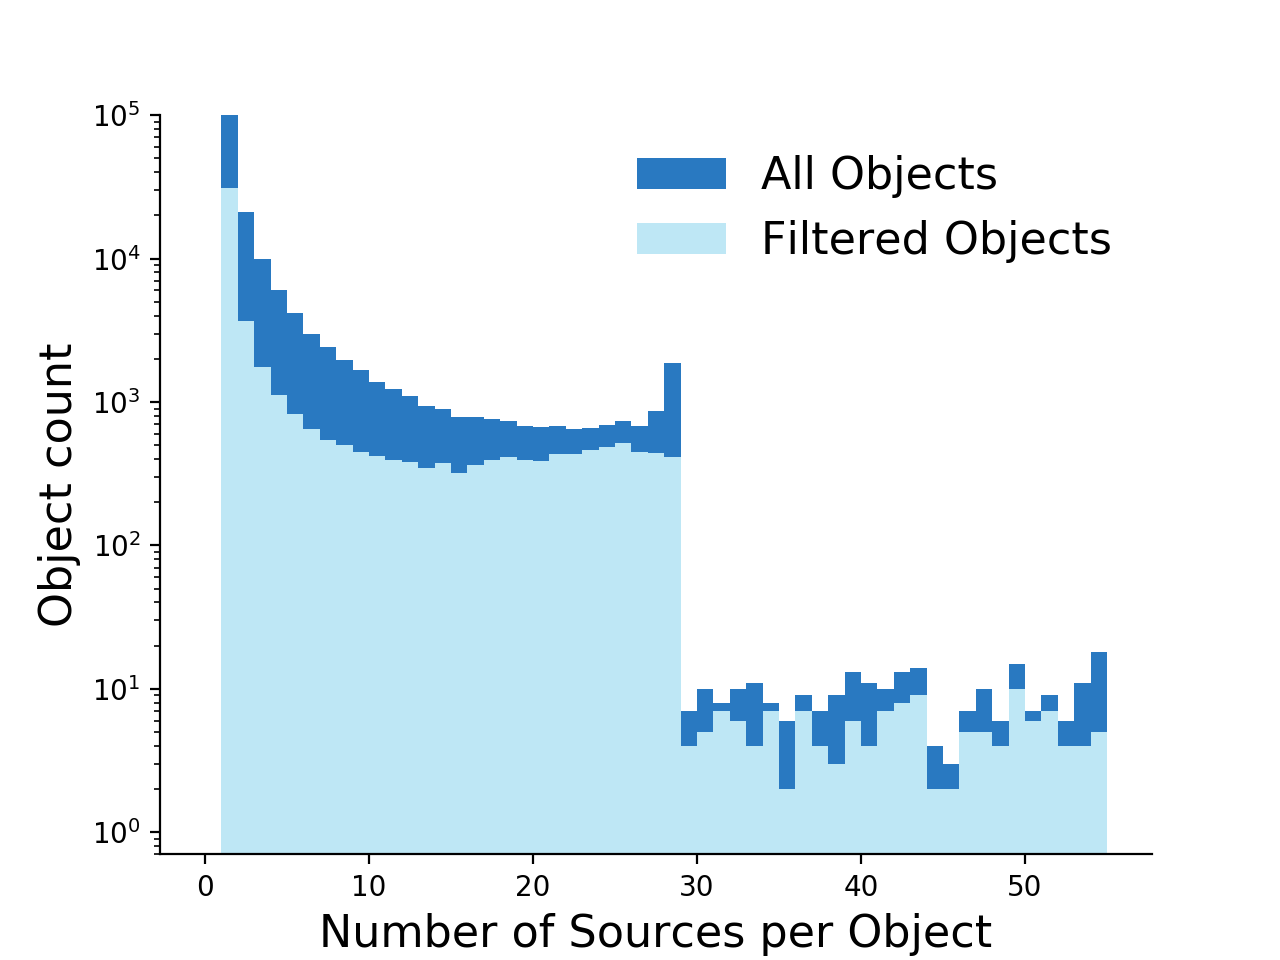

In [6]:
hist = doa.plotDiaObjectHistogram(objTable, goodObj)

<IPython.core.display.Javascript object>


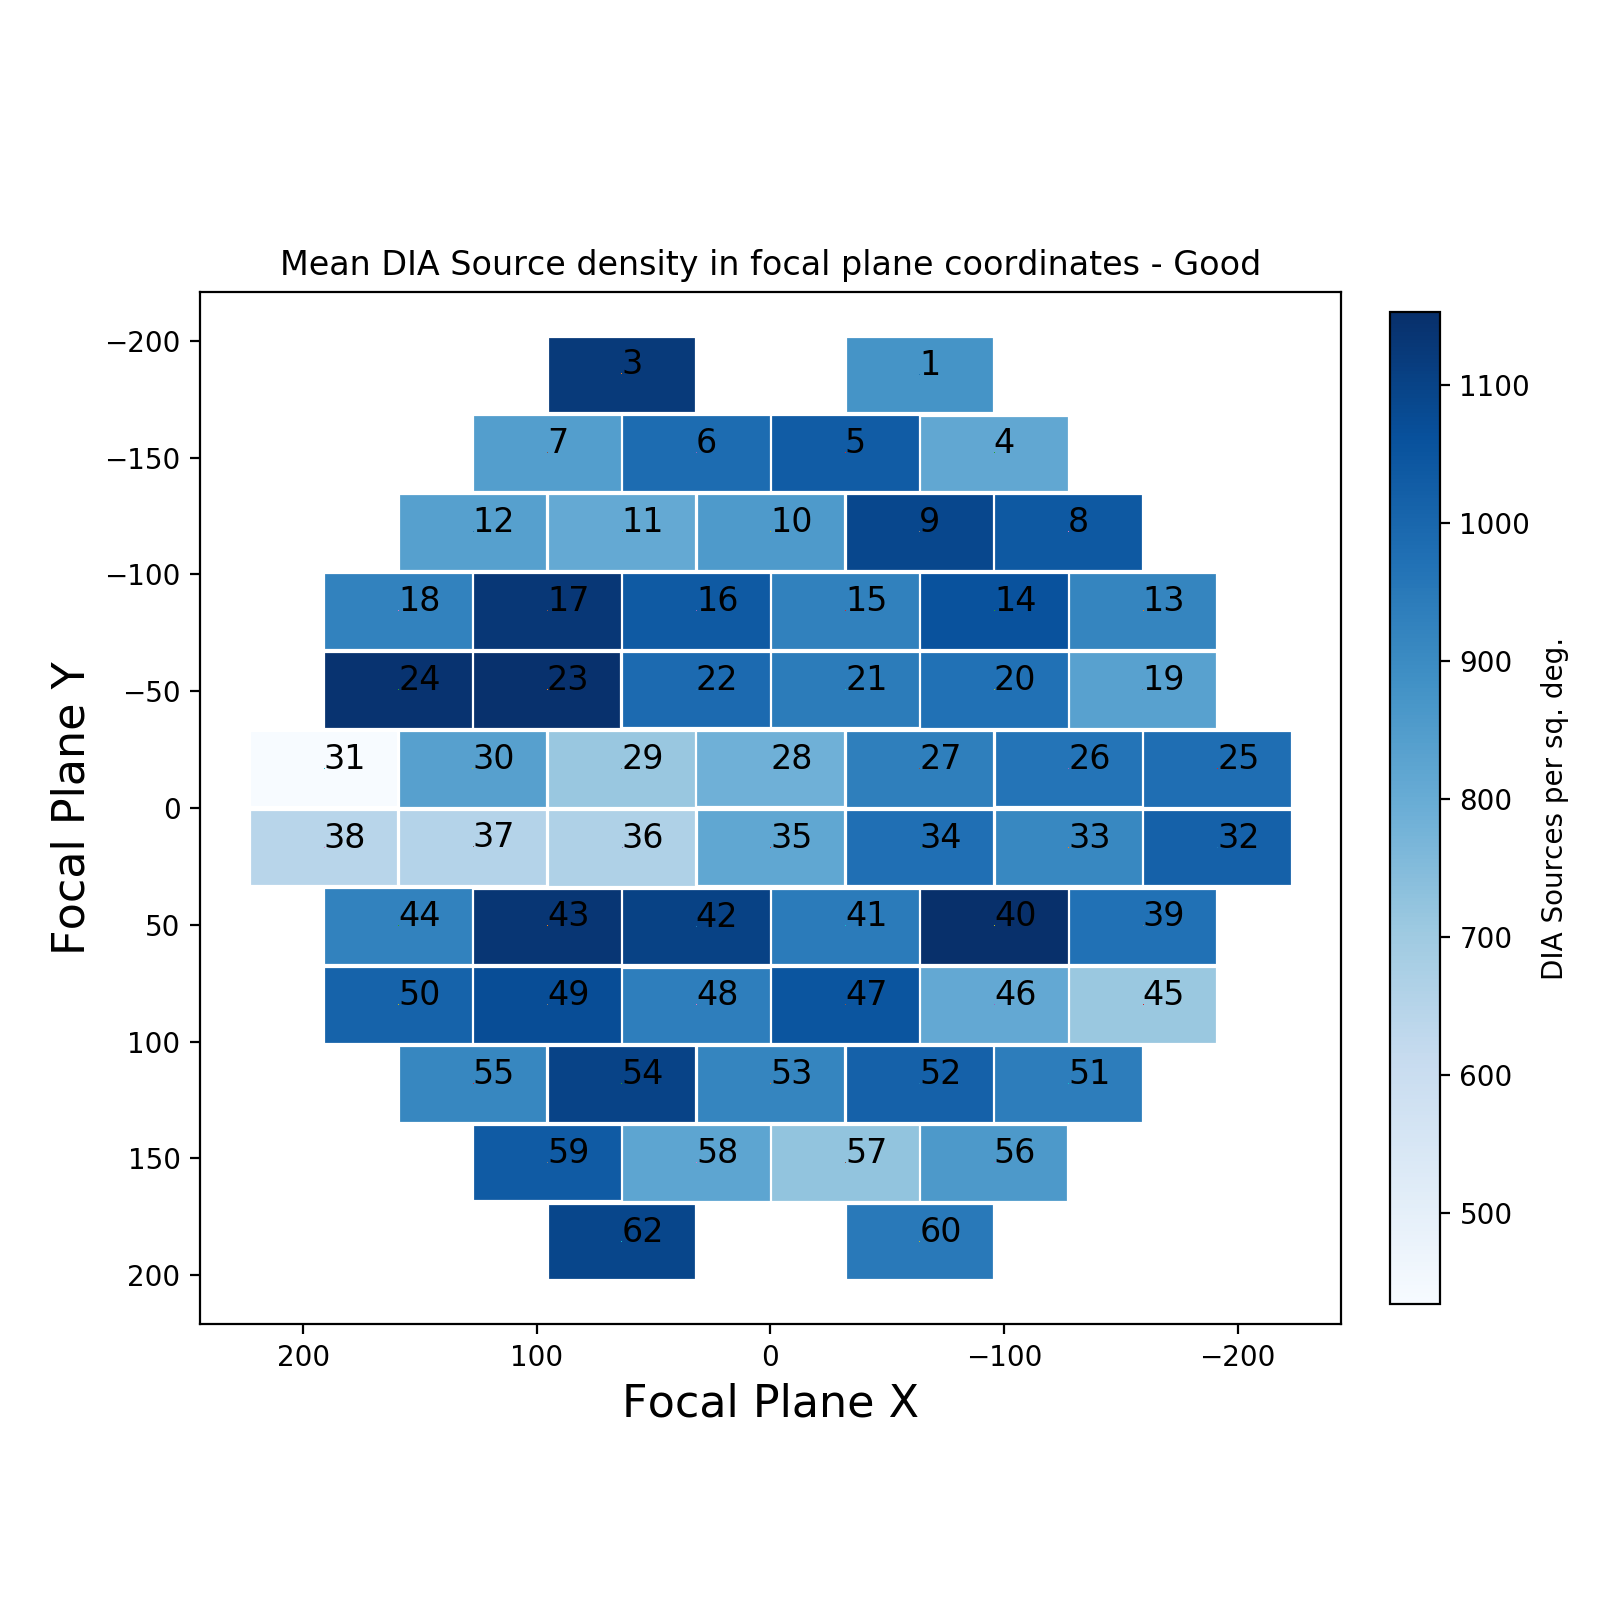

In [7]:
pla.plotDiaSourceDensityInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


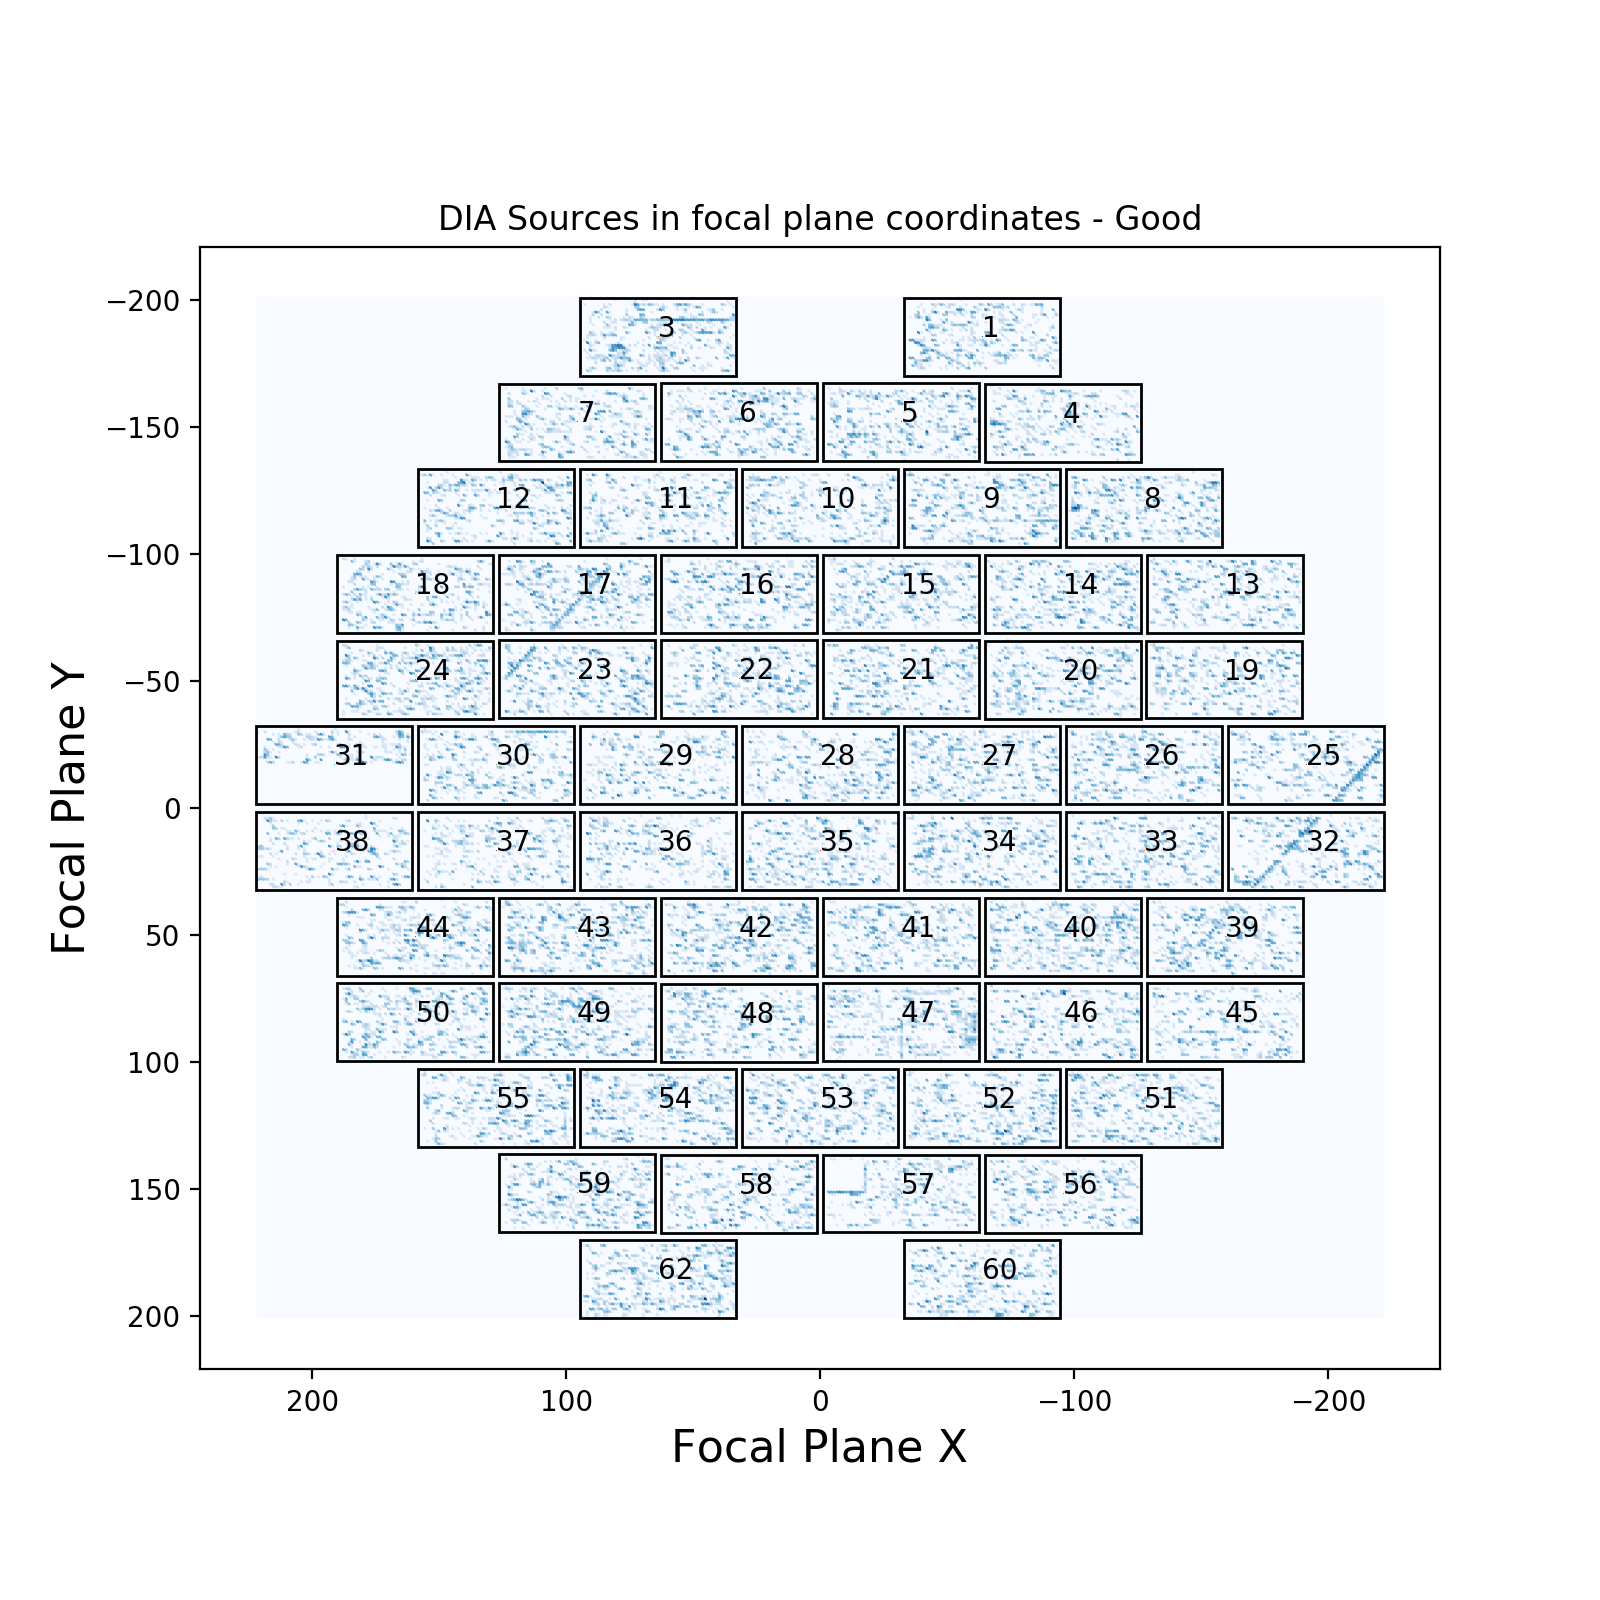

In [8]:
pla.plotDiaSourcesInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


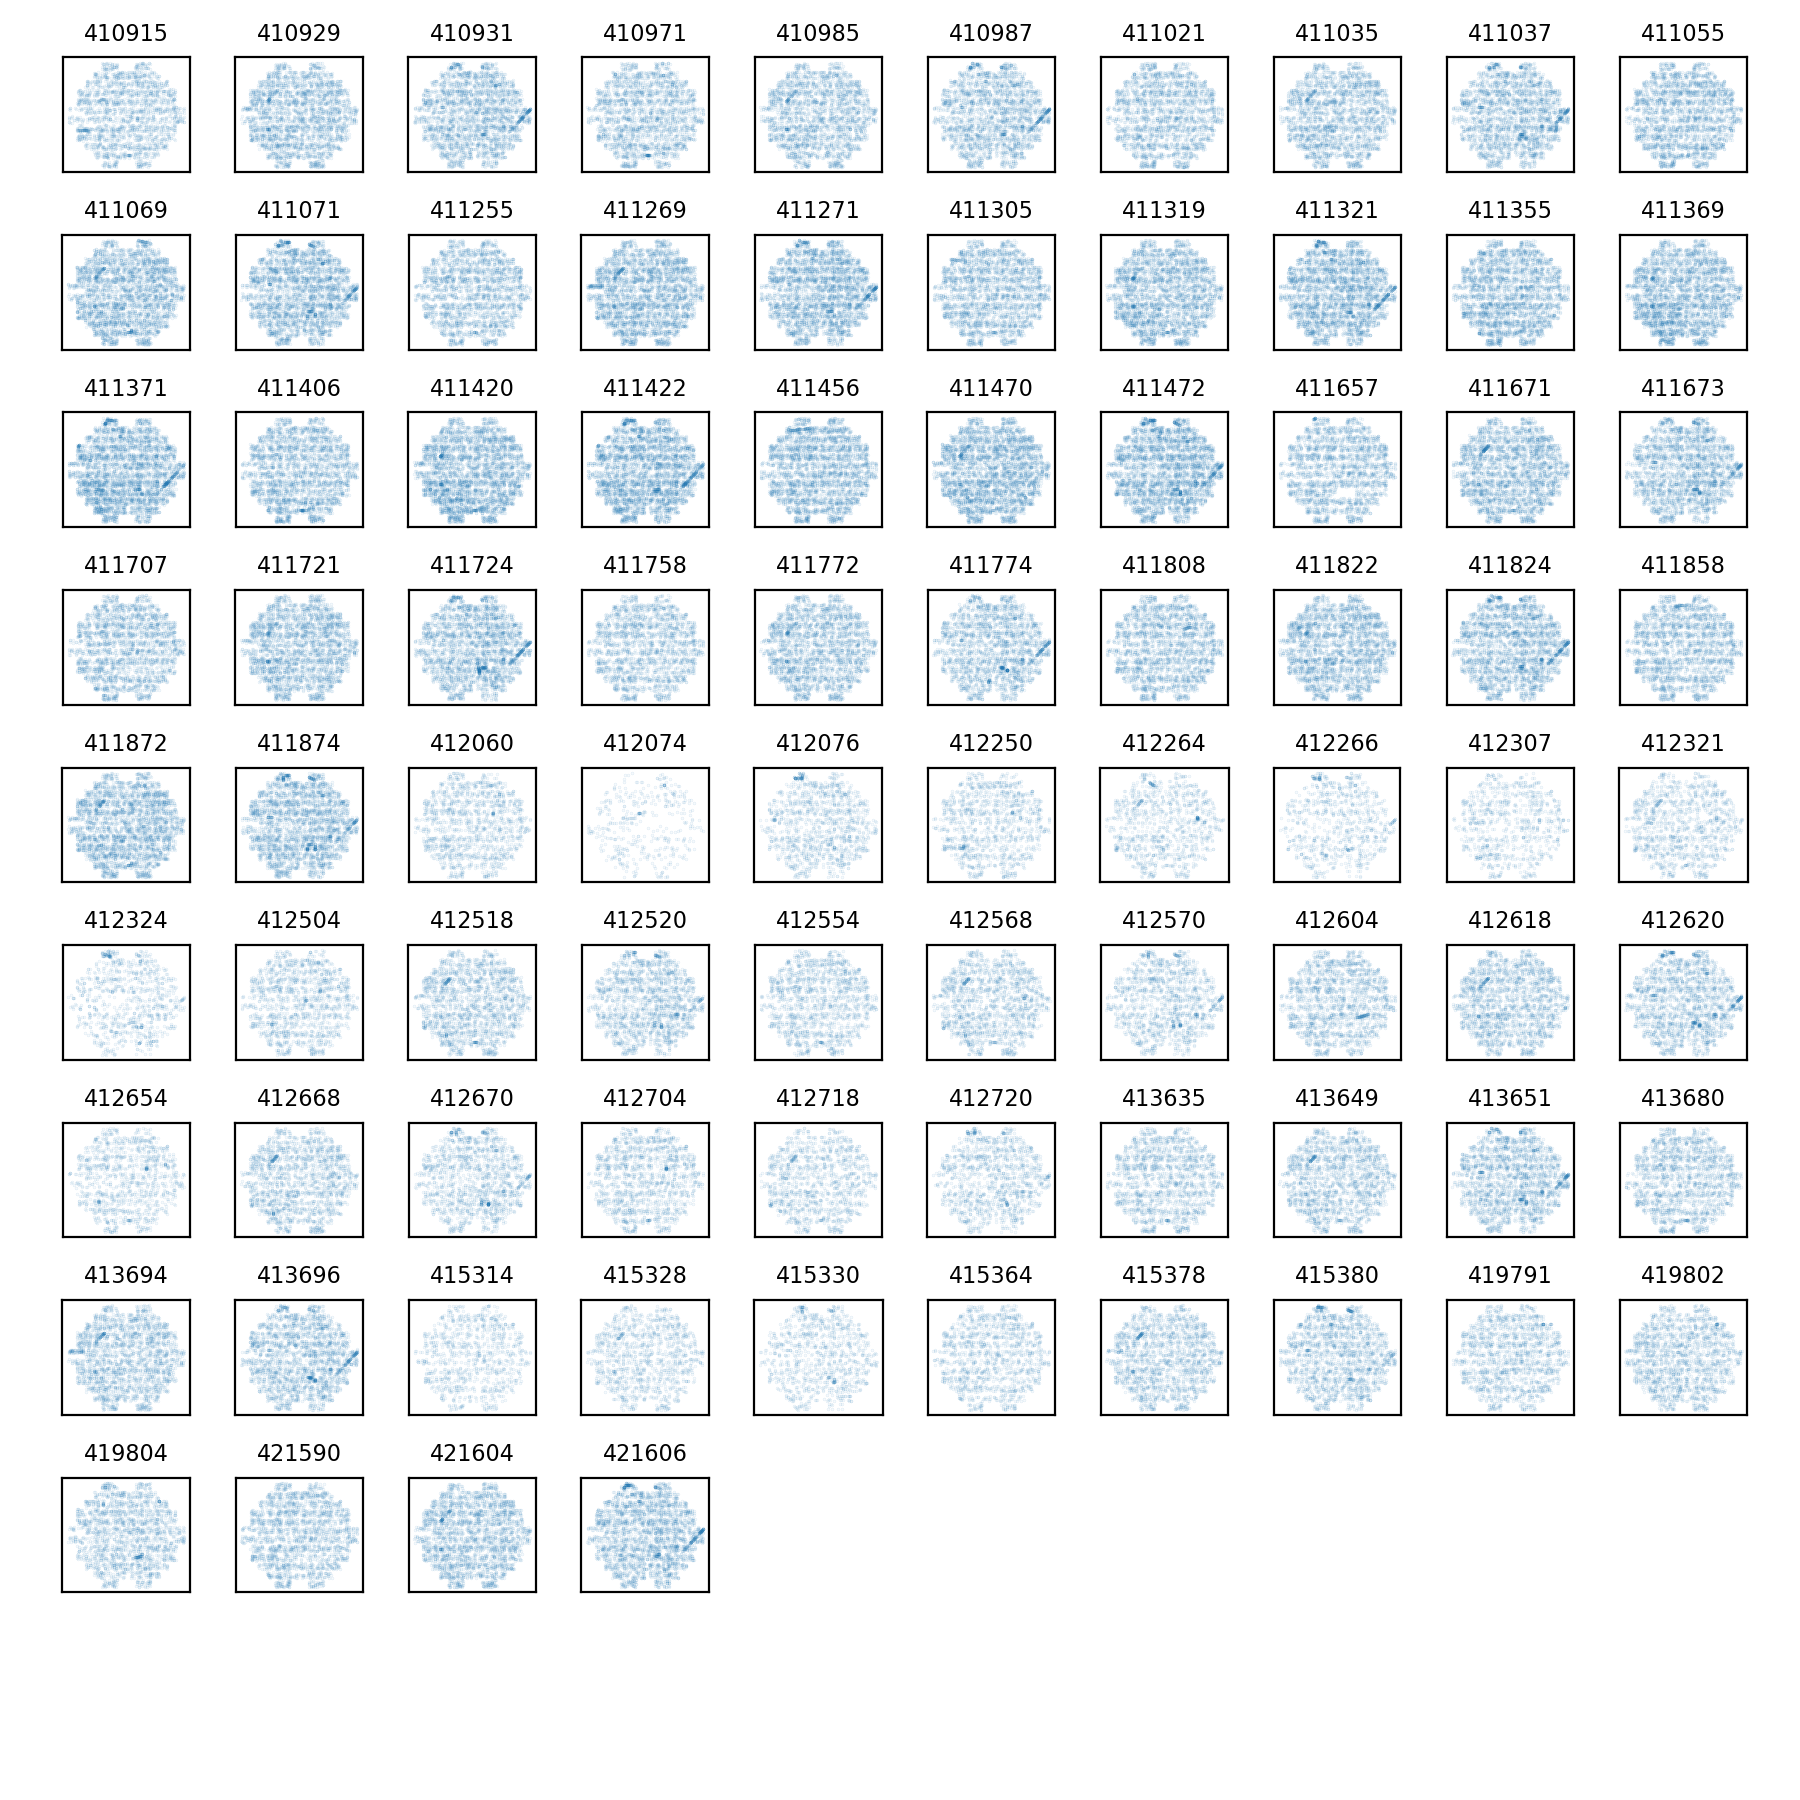

In [9]:
pla.plotDiaSourcesOnSkyGrid(repo, goodSrc)

## Compare to the last rerun from February 2020

In [10]:
repo_old = '/project/mrawls/hits2015/rerun/cw_2020_02'

In [11]:
objTable_old, srcTable_old, goodObj_old, goodSrc_old = pla.loadTables(repo_old)

/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/ap_association/19.0.0-15-gcb2ec15+6/python/lsst/ap/association/mapApData.py:388: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  table_list = list(yaml.load_all(yaml_stream))


In [12]:
print(len(srcTable), len(srcTable_old))
print(len(goodSrc), len(goodSrc_old))
print(len(objTable), len(objTable_old))
print(len(goodObj), len(goodObj_old))

618472 633989
210712 218995
176880 178098
48324 48308


<IPython.core.display.Javascript object>


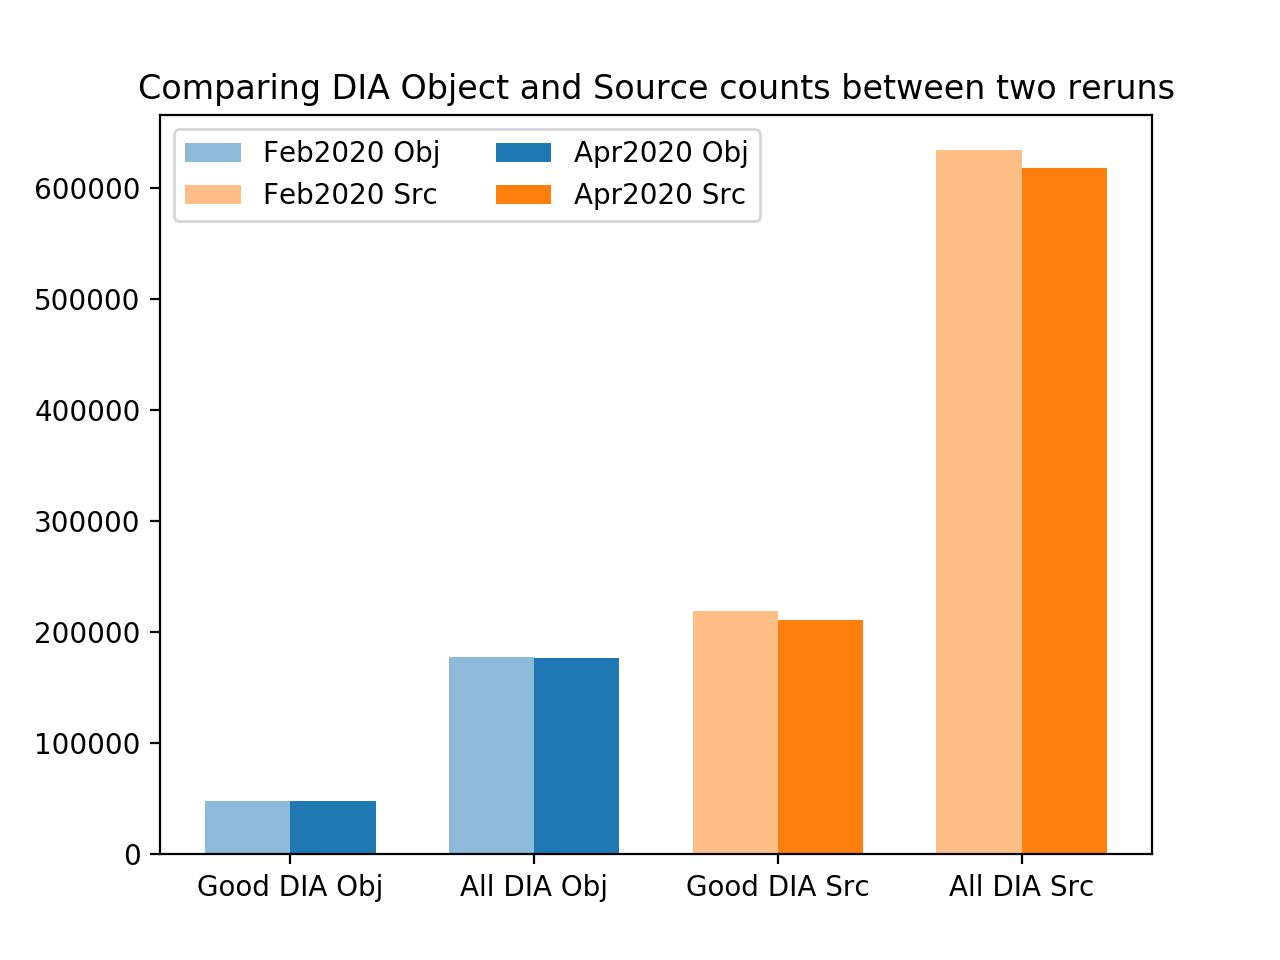

Text(0.5, 1.0, 'Comparing DIA Object and Source counts between two reruns')

In [13]:
srcTable1 = srcTable_old
goodSrc1 = goodSrc_old
objTable1 = objTable_old
goodObj1 = goodObj_old
label1 = "Feb2020"

srcTable2 = srcTable
goodSrc2 = goodSrc
objTable2 = objTable
goodObj2 = goodObj
label2 = "Apr2020"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.35

# February 2020
ax.bar(xbar - width/2, [len(goodObj1), len(objTable1)], 
       width, label=label1 + ' Obj', color='C0', alpha=0.5)
ax.bar(xbar + 2 - width/2, [len(goodSrc1), len(srcTable1)],
       width, label=label1 + ' Src', color='C1', alpha=0.5)

# April 2020
ax.bar(xbar + width/2, [len(goodObj2), len(objTable2)], 
       width, label=label2 + ' Obj', color='C0')
ax.bar(xbar + 2 + width/2, [len(goodSrc2), len(srcTable2)],
       width, label=label2 + ' Src', color='C1')

plt.legend(ncol=2)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts between two reruns')

## Compare to the "decorrelation debug" rerun from March 2020

In [14]:
repo_decorr = '/project/mrawls/hits2015/rerun/decorr_2020_03'

In [15]:
objTable_decorr, srcTable_decorr, goodObj_decorr, goodSrc_decorr = pla.loadTables(repo_decorr)

<IPython.core.display.Javascript object>


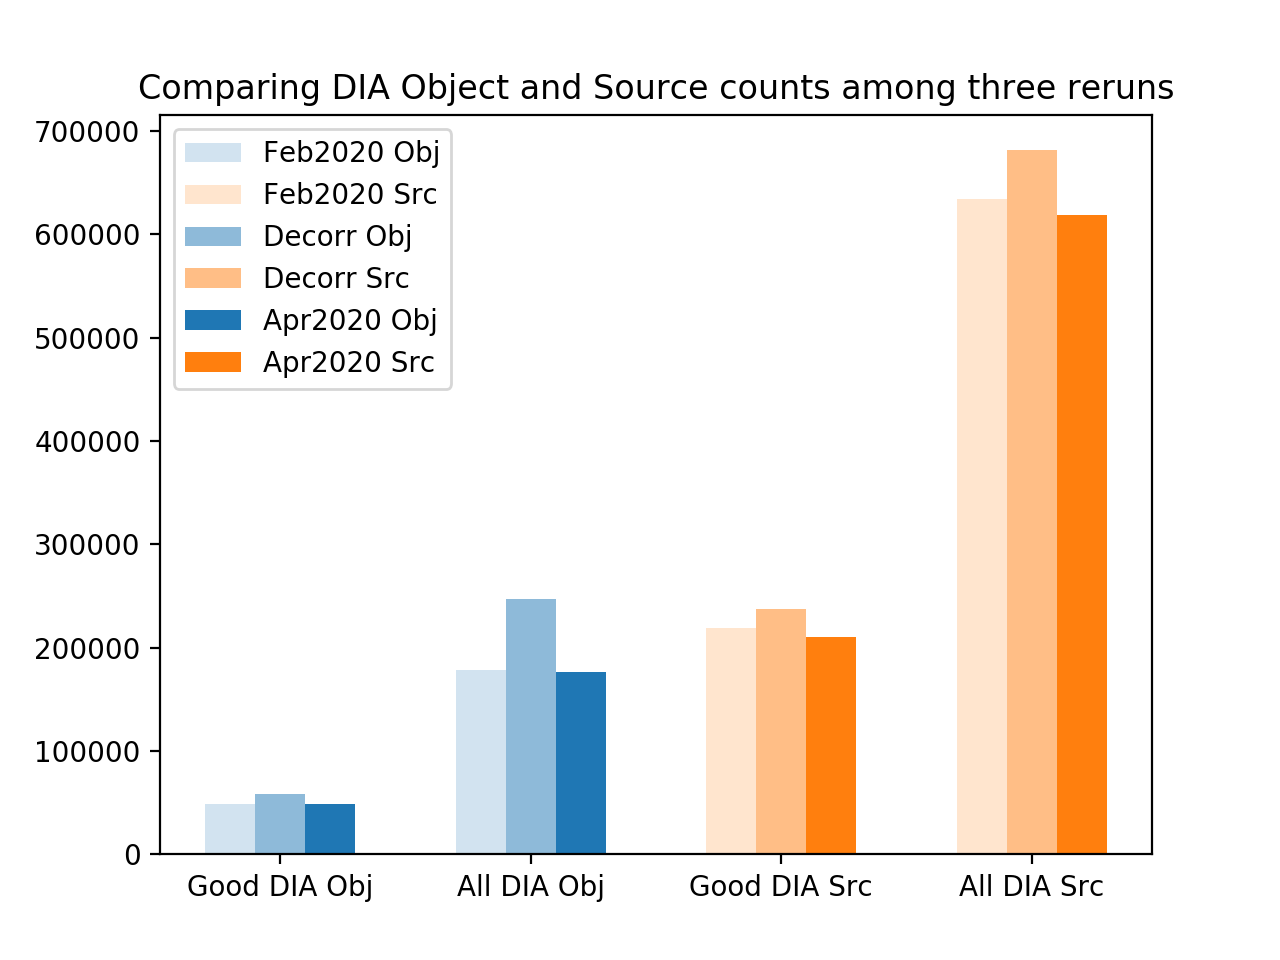

Text(0.5, 1.0, 'Comparing DIA Object and Source counts among three reruns')

In [16]:
srcTable3 = srcTable_decorr
goodSrc3 = goodSrc_decorr
objTable3 = objTable_decorr
goodObj3 = goodObj_decorr
label3 = "Decorr"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# February 2020
ax.bar(xbar - width, [len(goodObj1), len(objTable1)], 
       width, label=label1 + ' Obj', color='C0', alpha=0.2)
ax.bar(xbar + 2 - width, [len(goodSrc1), len(srcTable1)],
       width, label=label1 + ' Src', color='C1', alpha=0.2)

# Decorr (March 2020)
ax.bar(xbar, [len(goodObj3), len(objTable3)], 
       width, label=label3 + ' Obj', color='C0', alpha=0.5)
ax.bar(xbar + 2, [len(goodSrc3), len(srcTable3)],
       width, label=label3 + ' Src', color='C1', alpha=0.5)

# April 2020
ax.bar(xbar + width, [len(goodObj2), len(objTable2)], 
       width, label=label2 + ' Obj', color='C0')
ax.bar(xbar + 2 + width, [len(goodSrc2), len(srcTable2)],
       width, label=label2 + ' Src', color='C1')

plt.legend()
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts among three reruns')